# Data Loading

In [1]:
import pandas as pd
import os

data_dir = "../data"
#Read the data from data folder
user_sample = pd.read_json(os.path.join(data_dir, "user_sample.json"), lines=True)
edge_sample = pd.read_csv(os.path.join(data_dir, "edge_sample.csv"))
label_sample = pd.read_csv(os.path.join(data_dir, "label_sample.csv"))


# Social Network Analysis based on Following Graph

In [13]:
import networkx as nx
G = nx.Graph()  # Create an undirected graph


for index, row in edge_sample.iterrows():
    if row['relation'] == 'following':
        G.add_edge(row['source_id'], row['target_id']) # Add following relationships into the graph
    

In [15]:
label = {}
for index, row in label_sample.iterrows():
    label[row['id']] = row['label'] # Transform the label of users into dict

In [17]:
# Compute centrality measures
degree_centrality = nx.degree_centrality(G)  # Degree Centrality
betweenness_centrality = nx.betweenness_centrality(G)  # Betweenness Centrality
closeness_centrality = nx.closeness_centrality(G)  # Closeness Centrality

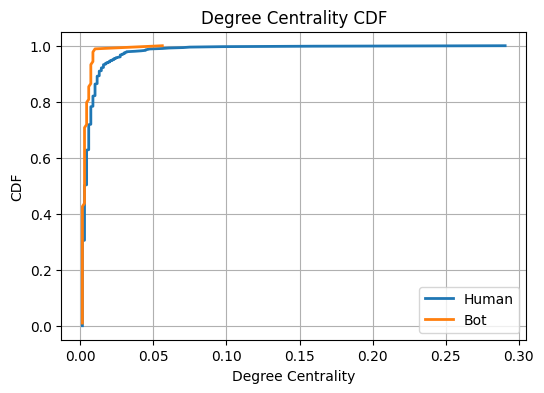

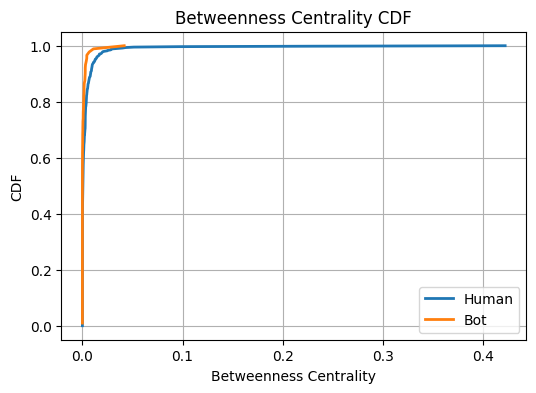

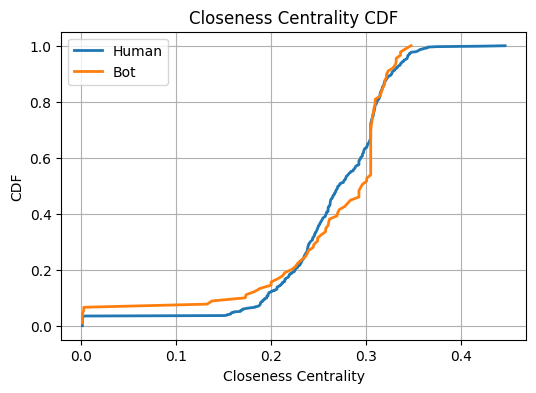

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Function to separate values by label
def get_centrality_by_label(centrality_dict, label_dict):
    human_values = []
    bot_values = []
    for node, value in centrality_dict.items():
        if node in label_dict:
            if label_dict[node] == 'human':
                human_values.append(value)
            else:
                bot_values.append(value)
    return np.array(human_values), np.array(bot_values)

# Get centrality values for humans and bots
deg_human, deg_bot = get_centrality_by_label(degree_centrality, label)
bet_human, bet_bot = get_centrality_by_label(betweenness_centrality, label)
clo_human, clo_bot = get_centrality_by_label(closeness_centrality, label)

# Function to plot CDF
def plot_cdf(data1, data2, title, xlabel):
    plt.figure(figsize=(6, 4))
    
    # Sort data for CDF
    x1 = np.sort(data1)
    y1 = np.arange(1, len(x1) + 1) / len(x1)
    
    x2 = np.sort(data2)
    y2 = np.arange(1, len(x2) + 1) / len(x2)
    
    plt.plot(x1, y1, label="Human", linewidth=2)
    plt.plot(x2, y2, label="Bot", linewidth=2)
    
    plt.xlabel(xlabel)
    plt.ylabel("CDF")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot CDFs
plot_cdf(deg_human, deg_bot, "Degree Centrality CDF", "Degree Centrality")
plot_cdf(bet_human, bet_bot, "Betweenness Centrality CDF", "Betweenness Centrality")
plot_cdf(clo_human, clo_bot, "Closeness Centrality CDF", "Closeness Centrality")

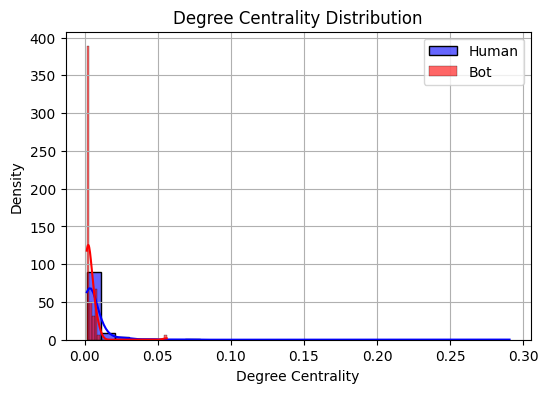

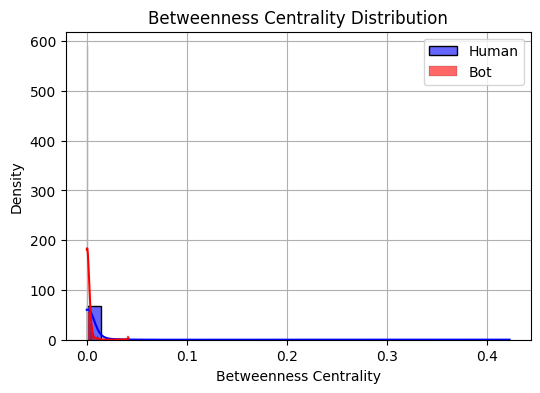

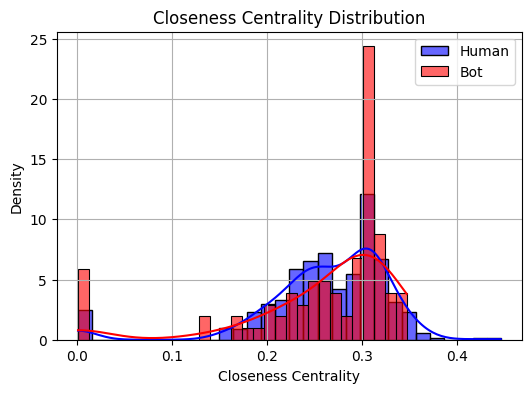

In [25]:
# Function to plot distribution (Histogram + KDE)
import seaborn as sns

def plot_distribution(data1, data2, title, xlabel):
    plt.figure(figsize=(6, 4))

    # Histogram with KDE
    sns.histplot(data1, kde=True, color='blue', label='Human', bins=30, stat='density', alpha=0.6)
    sns.histplot(data2, kde=True, color='red', label='Bot', bins=30, stat='density', alpha=0.6)
    
    plt.xlabel(xlabel)
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distributions
plot_distribution(deg_human, deg_bot, "Degree Centrality Distribution", "Degree Centrality")
plot_distribution(bet_human, bet_bot, "Betweenness Centrality Distribution", "Betweenness Centrality")
plot_distribution(clo_human, clo_bot, "Closeness Centrality Distribution", "Closeness Centrality")


# **Results Analysis**

The following CDF plots compare the distributions of **degree centrality, betweenness centrality, and closeness centrality** between humans and bots in the Twibot-22 dataset.

## **1. Degree Centrality**  
- Both humans and bots have low degree centrality, with most values near **zero**.  
- Bots (orange) accumulate faster, indicating **fewer connections** compared to humans.  
- This suggests that bots are **less integrated** into the network.  

## **2. Betweenness Centrality**  
- Highly skewed distribution, with most accounts having low values.  
- Bots tend to have **lower betweenness**, meaning they are **less likely to be key intermediaries** in the network.  
- This implies that bots do not act as central hubs in information flow.  

## **3. Closeness Centrality**  
- Shows a **more gradual distribution** compared to the other measures.  
- Bots accumulate faster at **lower values**, indicating they are **farther from other nodes** and more **isolated**.  

## **Key Insights**  
- Bots generally have **lower degree, betweenness, and closeness centrality**, making them **less connected and less influential**.  
- The distinction is clearer in **degree and betweenness centrality**, while closeness centrality shows a **more gradual difference**.  
- These findings suggest that **centrality measures could be useful for bot detection**, especially when combined with other features.  
